# 九章 KNN 教程


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tqdm #看进度条

## Load data
- use .shape to check if all the data have been successfully loaded
- use plt.imshow to see what does data look like

In [2]:
data_dir = './input/'
train_row = 5000 # 如果想取全部数据，设置为最大值 42000
def load_data(data_dir, train_row):
    train = pd.read_csv(data_dir + 'train.csv', sep=',', header=0)
    X_train = train.values[:train_row, 1:]    #attributes特征, .values变成了 2d-ndarray [只读前train_row行:特征]
    y_train = train.values[:train_row,0]  #label  
    
    test_data = pd.read_csv(data_dir + 'test.csv', sep=',', header=0).values   # 无label，只有特征，不用slice
    return X_train, y_train, test_data

origin_X_train, origin_y_train, test_data=load_data(data_dir, train_row)


In [3]:
print(origin_X_train.shape, origin_y_train.shape,test_data.shape) 


(5000, 784) (5000,) (28000, 784)


## Split the training data into train and valid data
- training data: 
把原本的训练数据拆分成为20%验证集（8400个），80%训练集（33600个）



In [4]:
from sklearn.model_selection import train_test_split

X_train,X_valid, y_train, y_valid = train_test_split(origin_X_train,
                                                   origin_y_train,
                                                   test_size = 0.2,
                                                   random_state = 0)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


In [5]:
        # diff=dataset-x
        # diff_squared=diff**2
        # # diff_squared.sum(axis=1)   # 横着加所有纵坐标数字
        # dist=np.sqrt(diff_squared.sum(axis=1)) #vectors, 有多少个样本，这里就有多少个元素

In [6]:
class KNN:
    def train(self,X,y):
        self.X_train=X
        self.y_train=y
    
    def predict(self,x,k=3):
        dataset= self.X_train
        labels=self.y_train

        """
        len(dist) -> 4000
        dist.shape -> (4000,)
        square root of a number
        index.shape -> (4000,)
        """
        dist=np.sqrt(((dataset-x)**2).sum(axis=1))
        # print(dist)
        # [2490.59852244 2254.96696206 2540.46885437 ... 2228.39740621 2381.15812159
        # 2467.41970487]
        # ...
        index=dist.argsort()# 由小到大，得到排好序的对应的index
        # print(index.shape)
        # [3845 2899 3566 ...  244 3526  767]
        # ...



       #取k个距离最小的index
        label_cnt={}
        for i in range(k):
            label=labels[index[i]]
            label_cnt[label] = label_cnt.get(label,0) +1

        #距离最近的k个样本中，记录每个label出现了多少次，返回最近的k个里出现次数最多的label；即得到预测的label。
        max_cnt,res=0,0
        for key, val in label_cnt.items():
            if val > max_cnt:
                max_cnt = val
                res = key

        return res 


In [7]:
# a=np.array([2.3,1.5,3.4,0.6])
# a.argsort()

## KNN训练

In [8]:
from sklearn.metrics import accuracy_score
classifier=KNN()
classifier.train(X_train, y_train)

In [9]:
max_accuracy,ans_k=0,0
for k in range(1,4):
    print("k = " + str(k) + 'start training')
    pred=[]

    for i in range(X_valid.shape[0]): #1000
        # print(X_train[i])
        output=classifier.predict(X_valid[i],k)
        pred.append(output)

    accuracy = accuracy_score(y_valid,pred)
    print("k = " + str(k), "accuracy = " + str(accuracy))

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        ans_k=k
print(ans_k)

k = 1start training
k = 1 accuracy = 0.919
k = 2start training
k = 2 accuracy = 0.919
k = 3start training
k = 3 accuracy = 0.925
3


## 测试



In [10]:
k = 3
knn=KNN()
knn.train(X_train,y_train)
test_data = test_data[:300]
preds = []
for i in tqdm.trange(300):
    preds.append(knn.predict(test_data[i],k))



100%|██████████| 300/300 [00:12<00:00, 24.02it/s]


In [11]:
preds[:5]

[2, 0, 9, 0, 3]

3


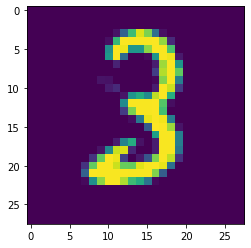

In [12]:
idx=4
print(preds[idx])
plt.imshow(test_data[idx].reshape(28,28))
plt.show()

In [13]:
out_file=open('predictions.csv','w')
out_file.write('ImageId, Label\n')
for i in range(len(preds)):
    out_file.write(str(i+1)+',' + str(pred[i]) + '\n')
out_file.close()

In [14]:
# pd.DataFrame({"ImageId": list(range(1,len(y_pred)+1)),"Label": y_pred}).to_csv('Digit_Recogniser_Result.csv', index=False,header=True)pd.DataFrame({"ImageId": list(range(1,len(y_pred)+1)),"Label": y_pred}).to_csv('Digit_Recogniser_Result.csv', index=False,header=True)

## Source:
- https://www.kaggle.com/c/digit-recognizer


